<center> <h1>Prediction of the Onset of Aurora Brightening (Substorm Onset)</h1> </center>

# Project Background

In [1]:
from IPython.core.display import HTML
HTML("""<center><img src="./plots/aurora.jpg", width=80%><center>""")

Image source: http://www.lovethesepics.com/2015/01/50-exceptionally-beautiful-auroras-pics/

## Technical Definitions

**Substorm**: A Sudden explosive brightening of the Aurora

**Substorm Onset**: The moment when a Substorm is about to occur

# Datasets

In [2]:
# load packages
import pandas as pd
import numpy as np
import datetime as dt
import sqlite3
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
# Select a style
plt.style.use("fivethirtyeight")

# show the figures within the notebook
%matplotlib inline

# Center output plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Data Overview

### Solar Wind (SW) and Interplanetary Magnetic Fields (IMF) - Measurements from Satellites

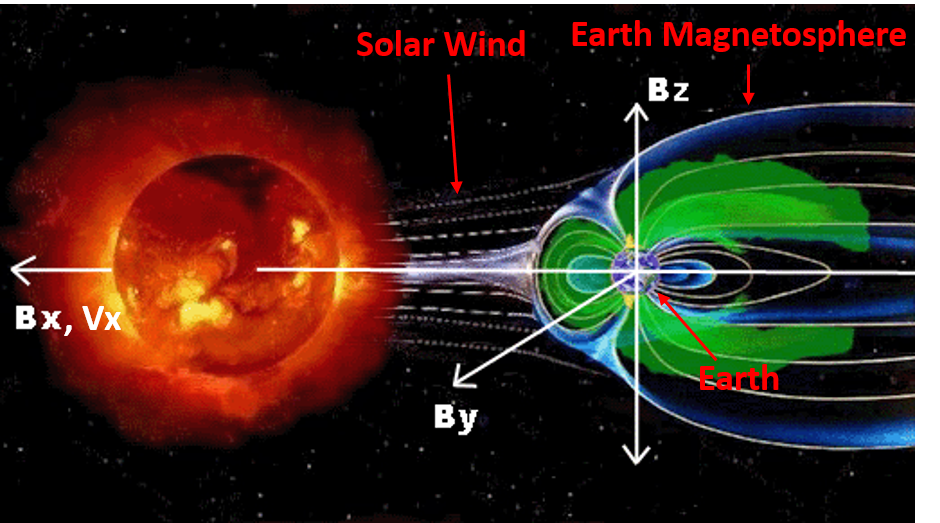

In [3]:
Image(filename="./plots/S-M-I.png", width=500)

In [4]:
# Load Interplanetary Magnetic Fields
db_dir = "../data/sqlite3/"
omn_dbname = "omni_sw_imf.sqlite"
omn_tabname = "imf_sw"
aul_dbname = "au_al_ae.sqlite"
aul_tabname = "aualae"
sml_dbname = "smu_sml_sme.sqlite"
sml_tabname = "smusmlsme"
onset_time = dt.datetime(1997, 1, 3, 21, 50)
param_timerange = [onset_time - dt.timedelta(minutes=180),
                  onset_time + dt.timedelta(minutes=120)]
# Make a DB connection
conn = sqlite3.connect(db_dir + omn_dbname,
                       detect_types = sqlite3.PARSE_DECLTYPES)
command = "SELECT * FROM {tb} " +\
          "WHERE datetime BETWEEN '{stm}' and '{etm}'"
command = command.format(tb=omn_tabname, stm=param_timerange[0],
                         etm=param_timerange[1])
# Load data to a dataframe
df_imf = pd.read_sql(command, conn)
df_imf[["datetime", "Bx", "By", "Bz", "Vx", "Np"]].head()
#df_imf[["Bx", "By", "Bz", "Vx", "Np"]].plot()

,datetime,Bx,By,Bz,Vx,Np
0,1997-01-03 18:50:00,1.20,-0.19,1.26,-345.7,9.95
1,1997-01-03 18:51:00,0.27,-0.35,1.19,-344.6,9.87
2,1997-01-03 18:52:00,0.78,-0.14,0.90,-341.4,9.42
3,1997-01-03 18:53:00,0.06,-0.59,0.84,-341.5,9.09
4,1997-01-03 18:54:00,0.65,0.16,0.72,-349.3,10.07


**Selected Input Features**:

Bx : Interplanetary Magnetic Field x-component, measured in nT (Nanotesla)

By : Interplanetary Magnetic Field y-component, measured in nT (Nanotesla)

Bz : Interplanetary Magnetic Field z-component, measured in nT (Nanotesla)

Vx : Solar wind bulk velocity x-component, measured in km/s

Np : Ion number density in Solar wind, meased in (# of particles) /cm$^{3}$

### Geomagnetic Indices - Measurements from Ground Magnetometers

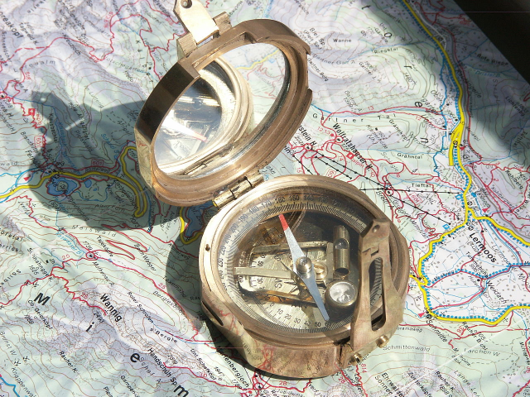

In [5]:
Image(filename="./plots/compass.png", width=500)

In [6]:
# Make a DB connection
conn = sqlite3.connect(db_dir + sml_dbname,
                       detect_types = sqlite3.PARSE_DECLTYPES)
command = "SELECT * FROM {tb} " +\
          "WHERE datetime BETWEEN '{stm}' and '{etm}'"
command = command.format(tb=sml_tabname, stm=param_timerange[0],
                         etm=param_timerange[1])
# Load data to a dataframe
df_sml = pd.read_sql(command, conn)
df_sml.columns = ["datetime", "SME", "SML", "SMU"]
df_sml.head()

,datetime,SME,SML,SMU
0,1997-01-03 18:50:00,316,-240,75
1,1997-01-03 18:51:00,291,-223,67
2,1997-01-03 18:52:00,302,-245,57
3,1997-01-03 18:53:00,311,-263,48
4,1997-01-03 18:54:00,339,-283,56


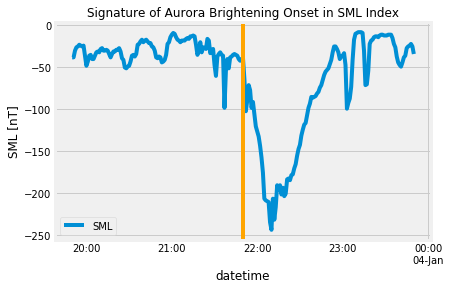

In [7]:
# Plot SML for a substorm event
ax = df_sml.loc[60:,].set_index("datetime").loc[:, ["SML"]].plot()
ax.set_ylabel("SML [nT]")
ax.set_title("Signature of Aurora Brightening Onset in SML Index", fontsize=12)
# Add the onset time
ax.axvline(dt.datetime(1997, 1, 3, 21, 50), color="orange")

### Events Onset List

In [8]:
# Load the onset list
onset_list = "../data/20190103-22-53-substorms.csv"
df_onset = pd.read_csv(onset_list)
df_onset.head()

,Date_UTC,MLAT,MLT
0,1996-01-01 20:16:00,71.32,22.45
1,1996-01-01 23:36:00,70.23,0.07
2,1996-01-02 00:25:00,69.36,22.92
3,1996-01-02 14:12:00,70.06,23.20
4,1996-01-02 16:09:00,65.81,0.62


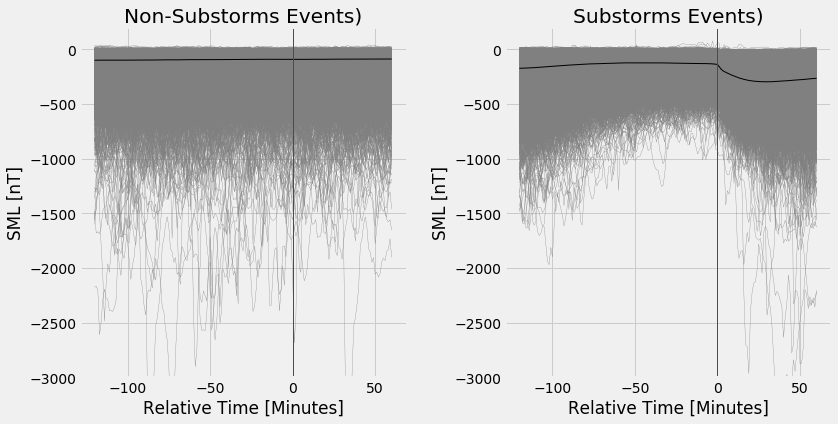

In [9]:
from superposed_SML import plot_SML
plot_SML(sdate=dt.datetime(1997, 1, 1),
         edate=dt.datetime(2017, 12, 30),
         onset_gap_minlim=10, before_onset=120,
         after_onset=60)

## Create Data Points

**Problem Statement**: Use 120-minute time history of solar wind bulk speed (Vx), proton number density (Np), and interplanetary magnetic field (IMF) components (Bx, By, Bz) to predict the occurrence probability of substorm onset. 

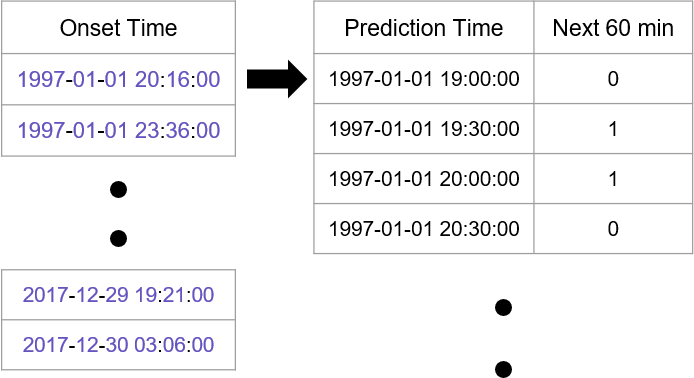

In [10]:
Image(filename="./plots/datapoints.png", width=500)

### Sample Data Point

loaded OMNI data
loaded SML data


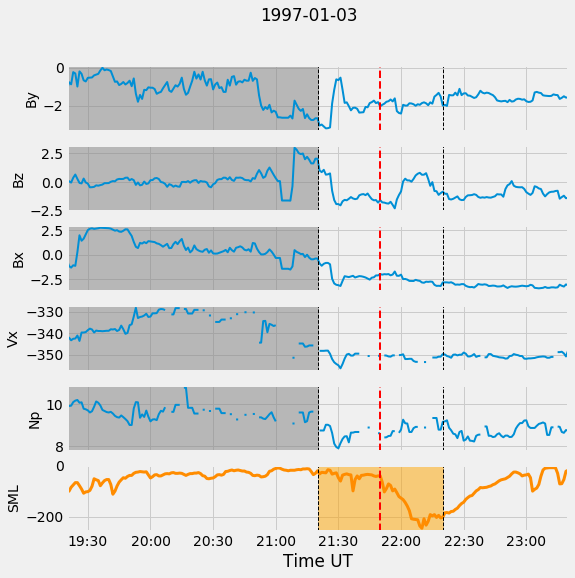

In [11]:
# Plot a sample data point
from sample_data_point import EventSummary
actual_lab = [0,1]
pred_lab = [1,0]
esObj = EventSummary(param_timerange, db_dir, omn_dbname, omn_tabname, aul_dbname,
                     aul_tabname, sml_dbname, sml_tabname)
esObj.generate_onset_plot(actual_lab, pred_lab,
                          onset_time, predLabProb=None, figType="png")

## Data Analysis

### Distribution of Input Parameters: Substorm Vs. Non-Substorm

Loading the data...
Plotting hist of each feature...


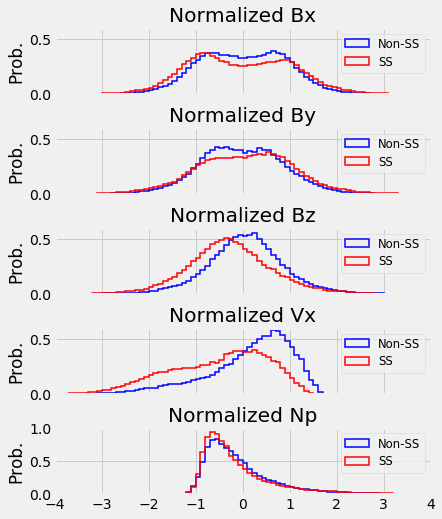

In [12]:
from feature_dist import plot_feature_hist
plot_feature_hist()

### PCA Analysis

/home/sd-spare/muhammad/software/anaconda2/envs/sson_pred/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


Loading the data...
Doing PCA ...
explained_variance_ratio: [0.25577831 0.22713037 0.14180204 0.10840398 0.08762464 0.02679178
 0.01577644 0.01281581]
singular_values: [3402.54481752 3206.34017276 2533.45523816 2215.10644536 1991.52208672
 1101.21657804  845.0384508   761.63163172]


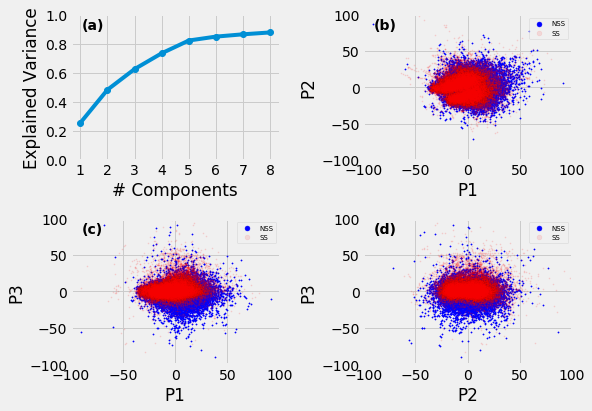

In [13]:
from pca_analysis import pca_analysis
pca_analysis()

# Model Development

## Candidate models

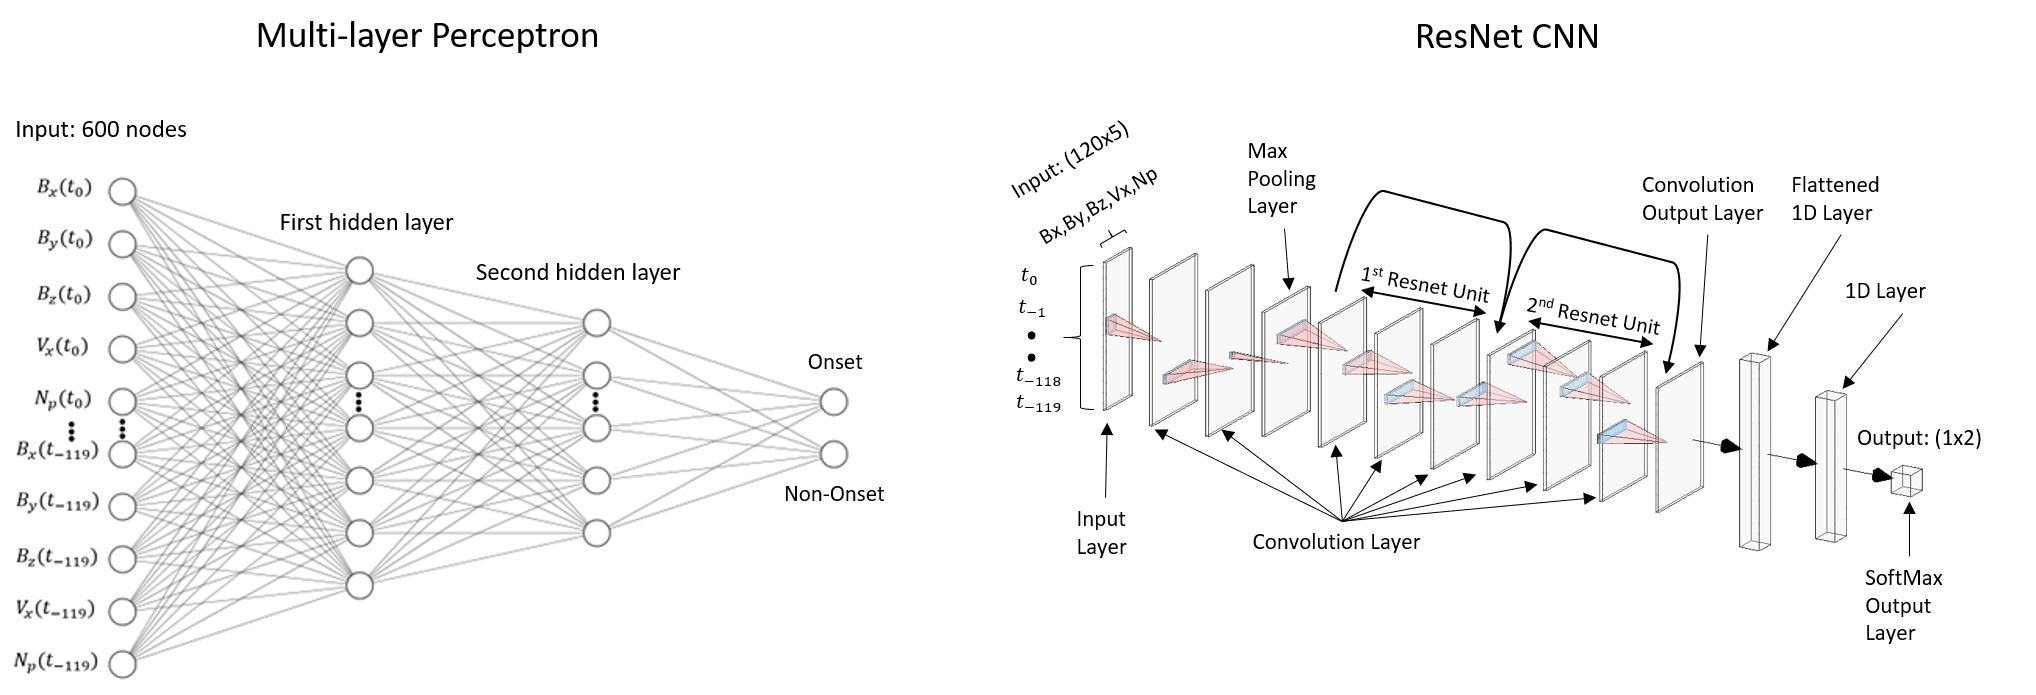

In [14]:
# Candidate models
Image(filename="./plots/dl_models.png")

## Model Training

Using TensorFlow backend.


Using SML data
loading the data...
Training the model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 121, 5)       0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 117, 16)      416         main_input[0][0]                 
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 117, 16)      64          conv1d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 117, 16)      0           batch_normalization_1[0][0]      
____________________________________________________

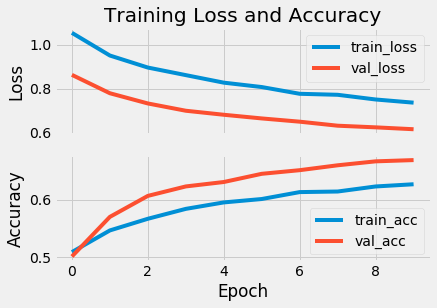

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%run resnet_main.py

# Model Performance

## Sample Examples

In [16]:
import pred_act_cmpr
pred_fname = "../data/resnet_test_data_pred.csv"
obj = pred_act_cmpr.PredSumry(pred_fname)
figs = obj.create_pred_plots(db_dir, omn_dbname, omn_tabname, aul_dbname,
                             aul_tabname, sml_dbname, sml_tabname)
figs

loaded model predicted data
loaded onset data from SML
loaded OMNI data
loaded SML data
plotting date---> 2014-03-30 15:00:00
plotting date---> 2014-04-21 12:30:00
plotting date---> 2016-11-28 21:30:00
plotting date---> 2016-12-14 18:00:00


['onset_binRes_60_nbins_1_stack_event_20140330-1500.png',
 'onset_binRes_60_nbins_1_stack_event_20140421-1230.png',
 'onset_binRes_60_nbins_1_stack_event_20161128-2130.png',
 'onset_binRes_60_nbins_1_stack_event_20161214-1800.png']

In [17]:
HTML("""
<br />
<table cellspacing="0" cellpadding="0" border="0">
    <tr>
        <td style="text-align: center;">
            <img src="./plots/onset_binRes_60_nbins_1_stack_event_20140421-1230.png" alt="" />
            <br />
        </td>
        <td style="text-align: center;">
            <img src="./plots/onset_binRes_60_nbins_1_stack_event_20161214-1800.png" alt="" />
            <br />
        </td>
    </tr>
    <tr>
        <td style="text-align: center;">
            <img src="./plots/onset_binRes_60_nbins_1_stack_event_20140330-1500.png" alt="" />
            <br />
        </td>
        <td style="text-align: center;">
            <img src="./plots/onset_binRes_60_nbins_1_stack_event_20161128-2130.png" alt="" />
            <br />
        </td>
    </tr>
</table>
""")


,
,


## Model Comparison

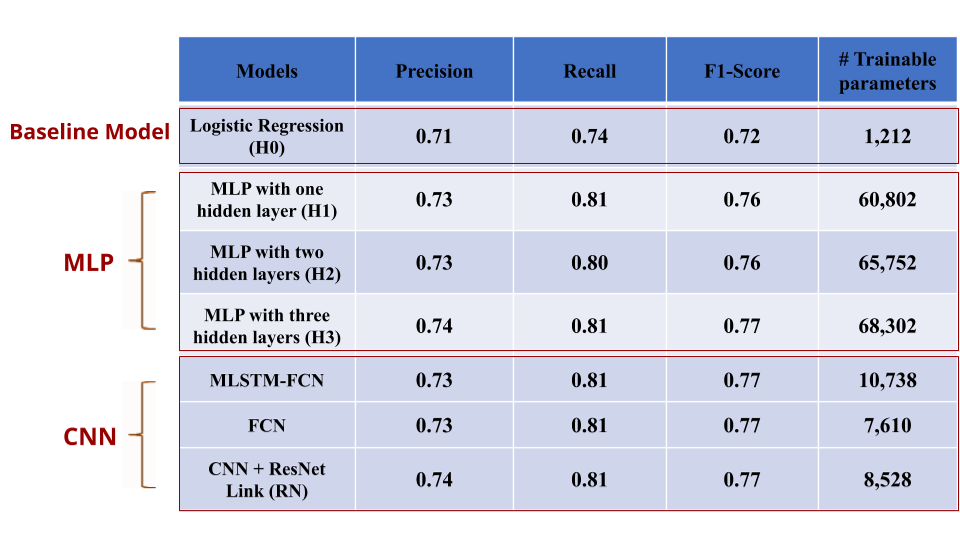

In [18]:
# Comparison of model performance metrics
Image(filename="./plots/model_comparison.png", width=800)

# Model Analysis

## Trend in Input Features

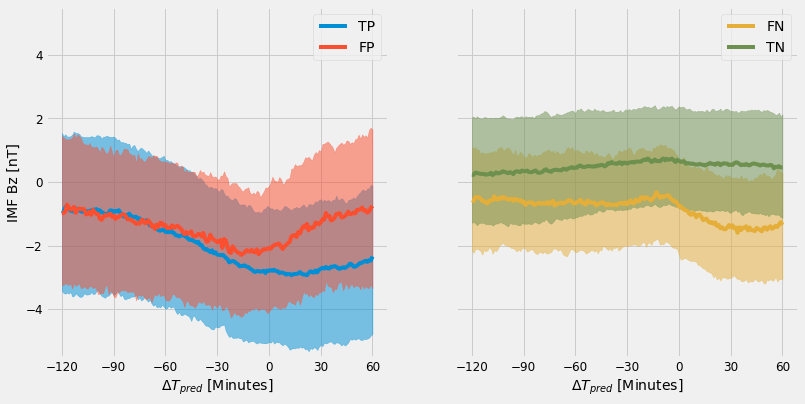

In [19]:
# Do epoch analysis to an input feature
from epoch_analysis import epoch_plot
epoch_plot(param="Bz")

## Parameter Importance

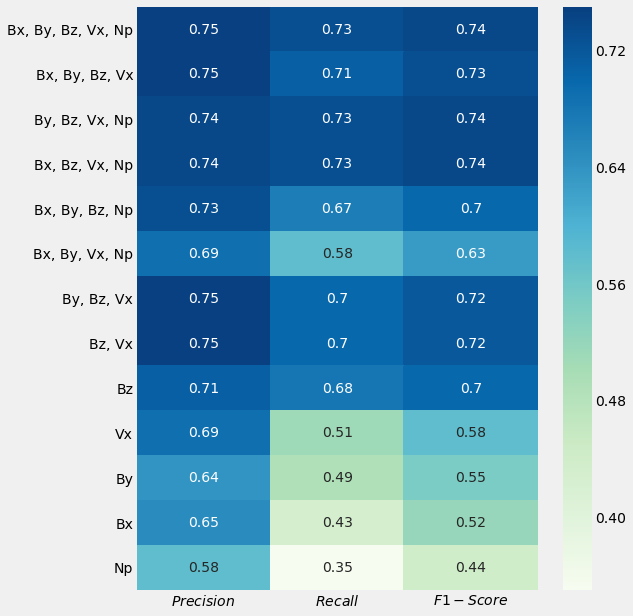

In [20]:
# Set the order of the input_parameters to be plotted
input_params = ["Bx, By, Bz, Vx, Np",
                "Bx, By, Bz, Vx",
                "By, Bz, Vx, Np",
                "Bx, Bz, Vx, Np",
                "Bx, By, Bz, Np",
                "Bx, By, Vx, Np",
                "By, Bz, Vx",
                "Bz, Vx",
                "Bz", "Vx", "By", "Bx", "Np"]
# Populate the performance metrics values for each element in the input_params list. 
# Note: the order of the values for each key in metrics_dict should match with that in input_params.
metrics_dict = {}
metrics_dict["$Precision$"] = [ 0.75, 0.75, 0.74, 0.74, 0.73, 0.69, 0.75, 0.75, 0.71, 0.69, 0.64, 0.65, 0.58]
metrics_dict["$Recall$"] =  [ 0.73, 0.71, 0.73, 0.73, 0.67, 0.58, 0.70, 0.70, 0.68, 0.51, 0.49, 0.43, 0.35]
metrics_dict["$F1-Score$"] =  [ 0.74, 0.73, 0.74, 0.74, 0.70, 0.63, 0.72, 0.72, 0.70, 0.58, 0.55, 0.52, 0.44]
# convert to DF
df = pd.DataFrame(metrics_dict, index=input_params)
df = df[ ['$Precision$', '$Recall$', '$F1-Score$'] ]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,10), sharex=True)
sns.heatmap(df, annot=True, cmap="GnBu")

# Summary & Challenges

**Summary**
* Successfully implemented latest CNN Architectures to multivariate time series data.
* The model achieves $\sim$75\% precision and recall rates. In contrast, an earlier prediction algorithm correctly identifies $\sim$21\% of the substorms in the same dataset.
* Model is as good as the data; more information is need to boost the performance.

**Challenges**
* Data leakage
* Class imbalances in training/valiadtion/test datasets
* Differences of event distributions in training/valiadtion/test datasets